# Image Processing using OpenCV



## NumPy

[NumPy](http://www.numpy.org/) is the foundation of all numerical computing - number crunching - in Python.  Everything from numerical methods to statistical analysis to linear algebra to, yes, computer vision is built on NumPy.  We won't be doing a full course worth of material on NumPy, but if you want to dive deeper, check out:
  * [NumPy User Guide](https://docs.scipy.org/doc/numpy-1.13.0/user/index.html)
  * [Scipy Lectures NumPy](http://www.scipy-lectures.org/intro/numpy/index.html)

In [2]:
import numpy as np # common abbreviation

# Matplotlib

[Matplotlib](https://matplotlib.org/) is the foundation of the standard plotting and graphics display in the Python universe.  Seaborn and Pandas both use it under-the-hood.  Jupyter Notebooks have tight integration with it.  Generally, we'll only be using its most basic features.  So, if you need to know more, you'll want to check out:
  * [Matplotlib User's Guide](https://matplotlib.org/users/index.html)
  * [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/matplotlib/index.html)

To get going with matplotlib, we will "always" issue the following commands:

In [3]:
# common abbreviation
import matplotlib.pyplot as plt  

# jupyter notebook specific to have plots appear in the notebook
%matplotlib inline               

# First Steps with OpenCV

## Installing OpenCV


Use Conda to install openCV:
    ### pip install opencv-python
    OR
    ### conda install opencv
    
[OpenCV](http://opencv.org/) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code.
  * Python API docs are [included here](http://docs.opencv.org/3.0-last-rst/)


For example, for `cv2.imread`:
  * [Docs for OpenCV3 shows Python API](http://docs.opencv.org/3.0-last-rst/modules/imgcodecs/doc/reading_and_writing_images.html#imread)
  * [Newer Docs for OpenCV3 - Missing Python API](http://docs.opencv.org/3.3.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
  * [Older OpenCV2 Docs](http://docs.opencv.org/2.4.13.3/modules/highgui/doc/reading_and_writing_images_and_video.html#cv2.imread)  
    * In some respects, the version 2.x docs seems more mature
    * Not up-to-date
    * There is some breakage (API differences) from 2.x -> 3.x

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 14.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [6]:
import cv2 # yes, we are using opencv version 

In [7]:
# code to find version of opencv
cv2.__version__

'4.9.0'

## Read Image File with openCV

In [11]:
# line 5:  def my_show(**kwargs) --> takes any "extra" keyword arguments and 
#                                    puts them in a dictionary named kwargs
# line 7:  ax.imshow(**kwargs)   --> takes kwargs (a dictionary) and 
#                                    "expands" them into keyword arguments to imshow
def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ' helper to display an image on an axes without grid/spine '
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='my_gshowgray', interpolation='bicubic', **kwargs):
    ' helper to display an image, in grayscale, on an axes without grid/spine '
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

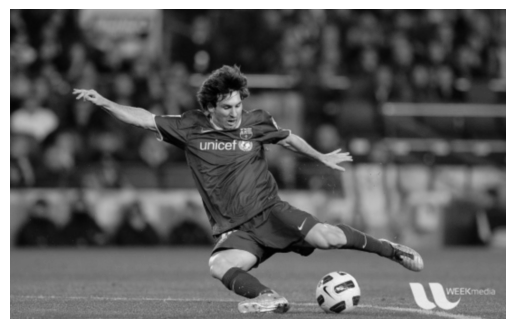

In [12]:
img_dir = './'
messi_gray = cv2.imread(img_dir+'image_dir/messi.jpg', 0)
my_gshow(plt.gca(), messi_gray) # use the default axes for quick-and-dirty

In [8]:
#Find the shape of the image
img = cv2.imread(img_dir+'image_dir/messi.jpg') # default here is RGB
img.shape

(342, 548, 3)

<class 'numpy.ndarray'> (342, 548, 3) uint8


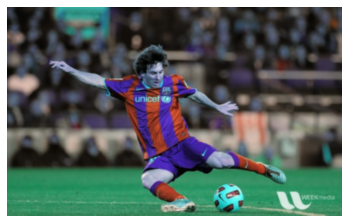

In [9]:
messi_color = cv2.imread(img_dir+'image_dir/messi.jpg') # default flag is 1 "color"

print(type(messi_color), 
      messi_color.shape, 
      messi_color.dtype)

my_show(plt.gca(), messi_color)
# FAIL:  mishmash of colors

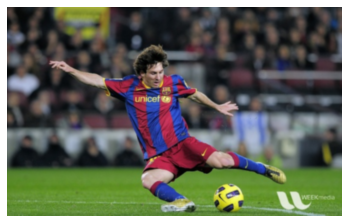

In [10]:
# opencv is GBR; matplotlib is RGB.  
my_show(plt.gca(), messi_color[:,:,::-1]) # walk last axis in opposite order (we'll never do this again!)

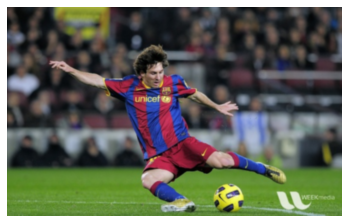

In [11]:
# better: explicitly convert the image to RGB
messi_rgb = cv2.cvtColor(messi_color, cv2.COLOR_BGR2RGB)
my_show(plt.gca(), messi_rgb)

## All utility functions for these exercise

In [12]:
import matplotlib.pyplot as plt
import cv2

def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ''' helper to display an image on an axes without grid/spine '''
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='gray', interpolation='bicubic', **kwargs):
    ''' helper to display an image, in grayscale, on an axes without grid/spine '''
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

def my_read_g(filename):
    ''' read from an image file to an rgb '''
    gray = cv2.imread(filename, 0)
    return gray

# these come up frequently.  we'll always want rgb (instead of bgr)
# and we often need both rgb and grayscale (grayscale starts many processing steps)
def my_read(filename):
    ''' read from an image file to an rgb '''
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def my_read_cg(filename):
    ''' read from an image file to an rgb and a grayscale image array '''
    rgb = my_read(filename)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    return rgb, gray

# now we can do this:
messi_rgb = my_read(img_dir+'image_dir/messi.jpg')

# or if we need both
messi_rgb, messi_gray = my_read_cg(img_dir+'image_dir/messi.jpg')


## Exercises with OpenCV and NumPy Together

Now, let's get a first look at the OpenCV documentation and practice making an OpenCV call. Find the online documentation for `copyMakeBorder` and read it.  Yes, it might be painful - but, you'll need to develop this skill - reading online documentation - to master all that OpenCV (and other open-source software) has to offer.  

Lastly, copy a region-of-interest from one part of the image to another, using NumPy array operations.  You'll need to deal with the fact that an assignment within NumPy arrays must be from a source and a destination with the same size (this isn't strictly true, but we'll use it as a simplification for this exercsise -- if you want to know more, look up broadcasting).

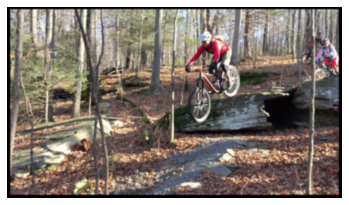

In [13]:
# Docs at:
# https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html#copymakeborder
# make sure you find the opencv 3 docs

outdoors = my_read(img_dir+'image_dir/farm-drop.jpg')
with_border = cv2.copyMakeBorder(outdoors, 20,20,20,20,cv2.BORDER_CONSTANT)
my_show(plt.gca(), with_border)

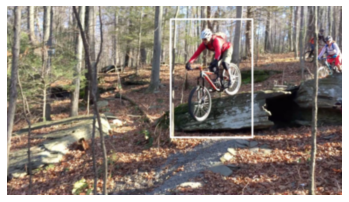

In [14]:
# we'll learn about drawing, this is another option to track down
# your region of interest (ROI)
marked_up = cv2.rectangle(outdoors, (1000,80), (1500, 800), (255,255,255), 10)
my_show(plt.gca(), marked_up)

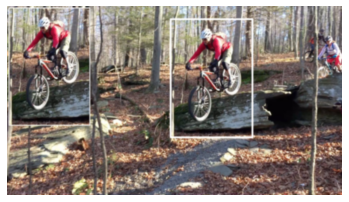

In [15]:
# duplicate the ROI in another part of the image
roi = marked_up[81:800, 1001:1500]
shape = roi.shape
marked_up[10:10+shape[0],10:10+shape[1]] = roi
my_show(plt.gca(), marked_up)

# Image Processing Tasks with OpenCV

Now that we've seen most of our foundational pieces, we can do the "common tasks" that we will usually need in a notebook (or in a script file).

## Image Merging

See how to merge two images. You can adjust the weights below to see what the results are. 

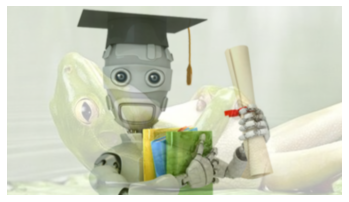

In [16]:
img_dir=img_dir+'image_dir/'
ml   = my_read(img_dir+'/ml.png')
frog = my_read(img_dir+'/frog.jpg')

min_r, min_c = (min(ml.shape[0], frog.shape[0]), 
                min(ml.shape[1], frog.shape[1]))

# blending of two images:
# by:  img1 * wgt1 + img2 * wgt2 + wgt3
#      addWeights(img1, wgt1, img2, wgt2, wgt3)
dst = cv2.addWeighted(  ml[:min_r, :min_c], 0.7,
                      frog[:min_r, :min_c], 0.3, 0)
my_show(plt.gca(), dst)

In [17]:
# place logo in corner of messi
logo, messi = map(my_read, [img_dir+'/opencv-logo.png', img_dir+'/messi.jpg'])

# technique for creating slices programmatically
# i.e., create code that does indexing/slicing in arr[:, a:b, :c]
shape = logo.shape[:-1]
corner = [slice(0,n) for n in shape] + [slice(None)]  # fancy:  [:logo.shape[0], :logo.shape[1], :]
print(corner)

[slice(0, 240, None), slice(0, 195, None), slice(None, None, None)]


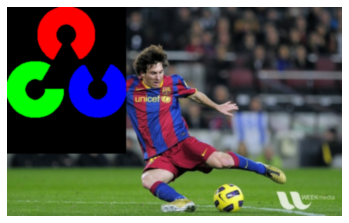

In [18]:
messi[tuple(corner)] = logo
my_show(plt.gca(), messi)

## Dealing with Colorspaces

Digital images can be represented in different color space and models. The most common model is RGB.

RGB is a additive color model in which Red, Green and Blue are added to create whole range of colours.

Range for RGB is:-
Red: [0, 255]
Green: [0, 255]
Blue: [0, 255]

[image.png](https://en.wikipedia.org/wiki/RGB_color_model#/media/File:AdditiveColor.svg) - RGB Color Model (Source: Wikipedia)

HSV stands for Hue, Saturation and Value and it is designed in a way such that it is more closely align with the way human vision perceives color-making attributes.

[image.png](https://en.wikipedia.org/wiki/HSL_and_HSV#/media/File:HSV_color_solid_cylinder_saturation_gray.png) - Cylindrical Model for HSV (Source: Wikipedia)

OpenCV uses the following ranges to represent each of the parameters in the HSV spectrum:-
Hue: [0, 179]
Saturation: [0, 255]
Value: [0, 255]

### Color space conversion

There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two which are most widely used ones, BGR to Gray and BGR to HSV. Remember OpenCV specifies in the order BGR rsther then RGB.

For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.

For BGR to Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR to HSV, we use the flag cv2.COLOR_BGR2HSV. To get other flags, just run following commands :


In [19]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

## Masking by Color

We can use techniques learned to extract a colored object. This technique can be heavily used in Object Tracking where each frame is masked to track the objects by color. 
In HSV, it is more easier to represent a color than RGB color-space. In our application, we will try to extract a blue colored object. So here is the method:


- Convert from BGR to HSV color-space
- Threshold the HSV image for a range of blue color
- Now extract the blue object alone, we can do whatever on that image we want.
Below is the code in detail :

In [20]:
def track_blue(frame):
    #Convert the input image to HSV 
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    
    # define range of blue color in HSV - Create in BGR and ... 
    rgb_blue = np.array([0,0,255]).astype(np.uint8).reshape(1,1,-1)
    # Convert BGR to HSV
    hsv_blue_mid = cv2.cvtColor(rgb_blue, cv2.COLOR_RGB2HSV)
    h_blue,_,_ = hsv_blue_mid.flatten()

    # Prepare the range to create the mask.
    lwr_blue = np.array([h_blue-10,  50,  50]).astype(np.uint8)
    upr_blue = np.array([h_blue+10, 255, 255]).astype(np.uint8)

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lwr_blue, upr_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)
    return res

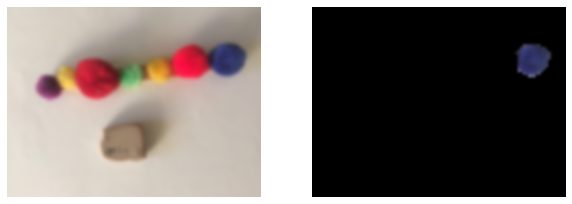

In [21]:
#Load a image and then mask with the blue color.
colorful = my_read(img_dir+"/fuzzyballs2.png")
selected = track_blue(colorful)

#Ploy the original image, mask and resulting image.
fig, axes = plt.subplots(1,2,figsize=(10,5))
my_show(axes[0], colorful)
my_show(axes[1], selected)


## Histogram Normalisation of Images

Certain image filters can be directly implemented using opencv functions.

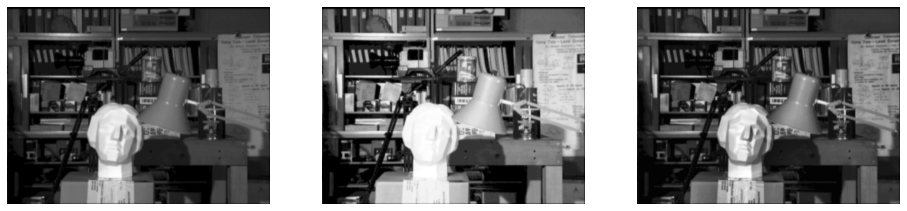

In [22]:
# histogram normalization makes low values lower and high values higher
# --> outliers *get worse*!

# contrast limited adaptive hist. equal.
multi = my_read_g(img_dir+'/tsukuba.png')
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_equal = clahe.apply(multi)

global_equal = cv2.equalizeHist(multi)

fig,axes = plt.subplots(1,3,figsize=(16,4))

other_args = {"vmin":0, "vmax":255, 'cmap':'gray'}
my_show(axes[0], multi, **other_args)
my_show(axes[1], global_equal, **other_args)
my_show(axes[2], clahe_equal,  **other_args)

## Foreground and Background

How to mix in the images. 

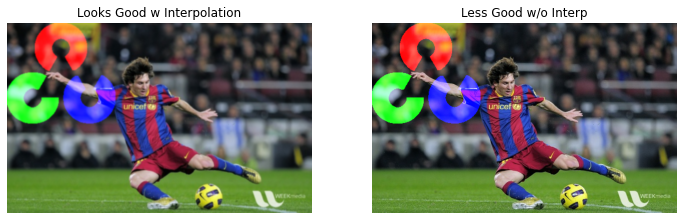

In [23]:
# let's be more subtle
logo, messi = map(my_read, [img_dir+'/opencv-logo.png', img_dir+'/messi.jpg'])
logo_fg = np.where(logo > 0)

fig, axes = plt.subplots(1,2,figsize=(12,6))

messi[logo_fg] = logo[logo_fg]
my_show(axes[0], messi, title="Looks Good w Interpolation")
my_show(axes[1], messi, interpolation=None, title="Less Good w/o Interp")

## Image threshold

Use the opencv thresholding to separate the foreground and background information for an image.

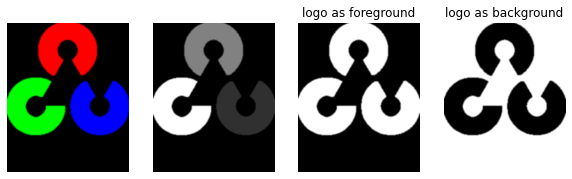

In [24]:
logo  = my_read(img_dir+'/opencv-logo.png')
messi = my_read(img_dir+'/messi.jpg')


# Create the grey scale version of the image and masks with the thresholding
logo_gray = cv2.cvtColor(logo,cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(logo_gray, 10, 255, cv2.THRESH_BINARY)
mask_inv  = cv2.bitwise_not(mask)

fig, axes = plt.subplots(1,4,figsize=(10,4))

my_show(axes[0], logo)
my_gshow(axes[1], logo_gray)
my_gshow(axes[2], mask, title='logo as foreground')
my_gshow(axes[3], mask_inv, title='logo as background')

In [25]:
messi_roi = messi[:logo.shape[0], :logo.shape[1]]

In [26]:
print(messi_roi.shape, mask_inv.shape, sep='\n')

(240, 195, 3)
(240, 195)


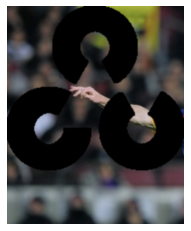

In [27]:
# create image as background + foreground

# background is messi where there isn't logo

# create background from messi
# logo  "on" --> messi off --> drop messi pixel
# logo "off" --> messi on  --> grab messi pixel

# this is convenient, compared to logical ops with array and mask of different kinds
# mask-ed points go to zero
bg = cv2.bitwise_and(messi_roi, messi_roi, mask=mask_inv)
my_show(plt.gca(), bg)

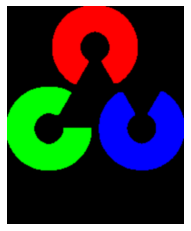

In [28]:
# foreground is from the logo
# logo 'on' --> want this pixel
fg = cv2.bitwise_and(logo, logo, mask=mask)
my_show(plt.gca(), fg)

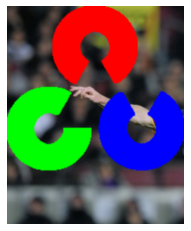

In [29]:
# pretty direct ... only one pixel from fg/bg is "on" at any given position
# b/c of our masking
combined = cv2.add(bg, fg)
my_show(plt.gca(), combined)

In [30]:
# compare to:
(logo>10).shape  # this is channel by channel

(240, 195, 3)

In [31]:
# so, let's get that effect without having to convert channels:
active_roi = (logo>10).any(axis=2)
silent_roi = np.logical_not(active_roi)
active_roi.shape

(240, 195)

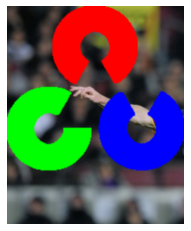

In [32]:
# alternative to np.newaxis:  np.expand_dims(mask_inv, -1)
fg = np.bitwise_and(logo, mask[:,:,np.newaxis])
bg = np.bitwise_and(messi_roi, mask_inv[:,:,np.newaxis])
combined = cv2.add(bg, fg)
my_show(plt.gca(), combined)

# Geometric Transformations of Images

It is possible to create geometric transformation of images.

In [33]:
#Utility function to resize images.
def size_me(img):
    ' given 80dpi, find size of image in inches from pixel dims '
    dpi = 80
    height, width, *depth = img.shape
    figsize = width / float(dpi), height / float(dpi)
    return figsize

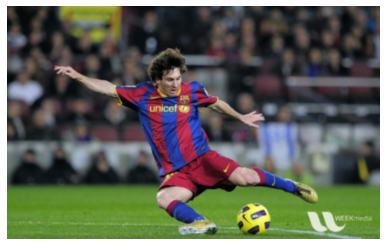

In [34]:
messi = my_read(img_dir+'/messi.jpg')
fig, ax = plt.subplots(1,1,figsize=size_me(messi))
my_show(ax, messi)

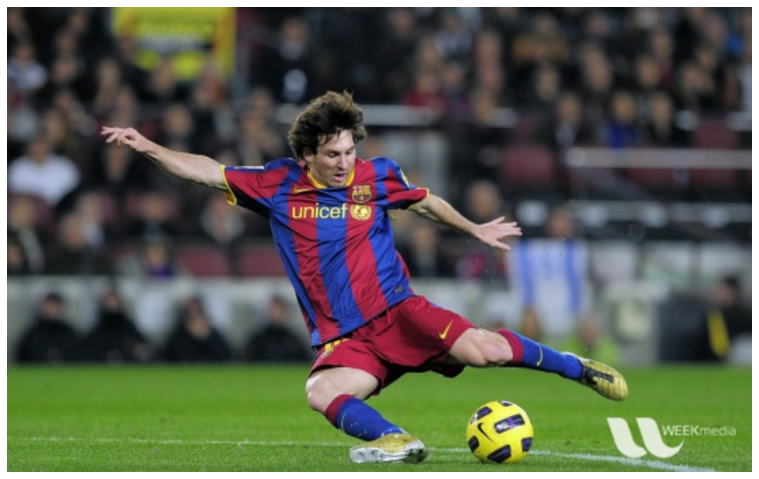

In [35]:
# zoom in (make bigger)
res = cv2.resize(messi, None, fx=2, fy=2, interpolation = cv2.INTER_AREA)
# slight use of matlab style api to avoid plt.subplots(1,1,...) call for just one axis 
plt.figure(figsize=size_me(res)) 
my_show(plt.gca(), res);

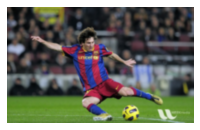

In [36]:
# zoom out (make smaller)
height, width = messi.shape[:2]
res = cv2.resize(messi, (int(.5*width), int(.5*height)), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=size_me(res))
my_show(plt.gca(), res)

Two primary types of transformations:
 * warpAffine:  2x3 matrix      (parallel lines stay parallel)
 * warpPerspective: 3x3 matrix

$x_{\text{shift}}$ is amount to the right (negative, indicates to the left)
$y_{\text{shift}}$ is amount down (negative indicates up)

$$M = 
\begin{bmatrix}
1 & 0 & x_{\text{shift}} \\
0 & 1 & y_{\text{shift}}
\end{bmatrix}
$$

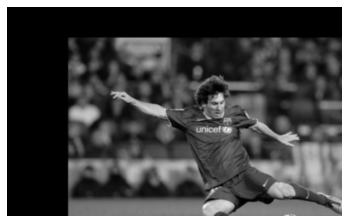

In [37]:
messi_gray = my_read_g(img_dir+'/messi.jpg')

height, width = messi_gray.shape   # r,c -> x,y

x_shift, y_shift = 100, 50  

M = np.array([[1, 0, x_shift],
              [0, 1, y_shift]], dtype=np.float32)
res = cv2.warpAffine(messi_gray, M, (width, height)) # arguments in x,y terms

my_show(plt.gca(), res, cmap='gray')

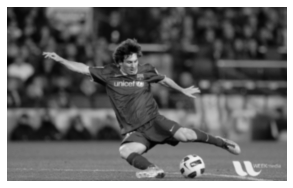

In [38]:
messi_gray = my_read_g(img_dir+'/messi.jpg')

height, width = messi_gray.shape   # r,c -> x,y

scale_factor = 0.75

M = np.array([[scale_factor, 0, 0],
              [0, scale_factor, 0]], dtype=np.float32)
res = cv2.warpAffine(messi_gray, M, (int(width * scale_factor), 
                                     int(height * scale_factor))) # arguments in x,y terms

plt.figure(figsize=size_me(res))
my_show(plt.gca(), res, cmap='gray')

$$M = 
\begin{bmatrix}
\cos(\theta) & - \sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}$$

Becomes:


$$M = 
\begin{bmatrix}
 \alpha & \beta  & (1-\alpha) x_{\text{center}} -      \beta y_{\text{center}} \\
-\beta  & \alpha &      \beta x_{\text{center}} + (1-\alpha) x_{\text{center}}
\end{bmatrix}$$

$$\begin{align}
\alpha &= scale \cos(\theta) \\
\beta  &= scale \sin(\theta) 
\end{align}$$

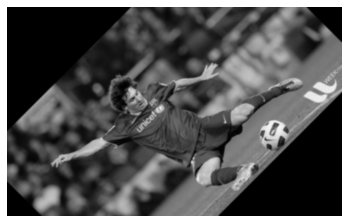

In [39]:
M = cv2.getRotationMatrix2D((width/2,height/2), 45, 1)
res = cv2.warpAffine(messi_gray, M, (width, height)) # args in xy terms (not rc terms)
my_show(plt.gca(), res, cmap='gray')

It is possible to define an affine transform by definine three before and after points.  With three points before and after a transform, the affine matrix can be inferred.

[[1.  0.  0. ]
 [0.5 0.5 0. ]]


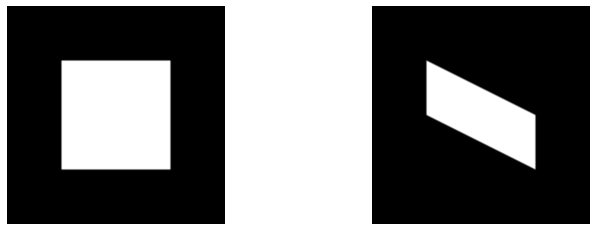

In [40]:
shape = (300,300)
orig = np.zeros(shape, dtype=np.uint8)
orig[75:225, 75:225] = 255

# NOTE:  play around with these to get a feel for what they do!
# args in xy terms (not rc terms)
pts1 = np.float32([[75,75], [75,225], [225,225]])
pts2 = np.float32([[75,75], [75,150], [225,225]])
M = cv2.getAffineTransform(pts1,pts2)
res = cv2.warpAffine(orig, M, shape)

print(M)

fig,axes = plt.subplots(1,2,figsize=(12,4))
my_show(axes[0], orig, cmap='gray')
my_show(axes[1], res, cmap='gray')

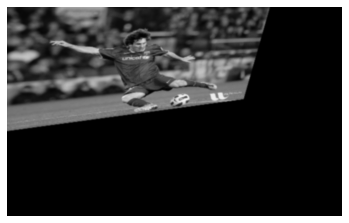

In [41]:
# perspective transform:  straight lines -> straight lines

# pts in r,c terms (:sadface:)
rows, cols = messi_gray.shape
pts1 = np.float32([[0,0],[rows-1,0], [0,cols-1], [rows-1, cols-1]])
pts2 = np.float32([[0,0],[300,0],[0,300],[250,250]])

M = cv2.getPerspectiveTransform(pts1,pts2)
res = cv2.warpPerspective(messi_gray, M, (cols, rows)) # r,c -> x,y terms

my_show(plt.gca(), res, cmap='gray')

## Create a Series of Transition Image

Pick two images and create a series of 20 images that show a transition from the first image to the second.  You can investigate playing the images as a movie, but creating a video is beyond the scope of today's discussion.

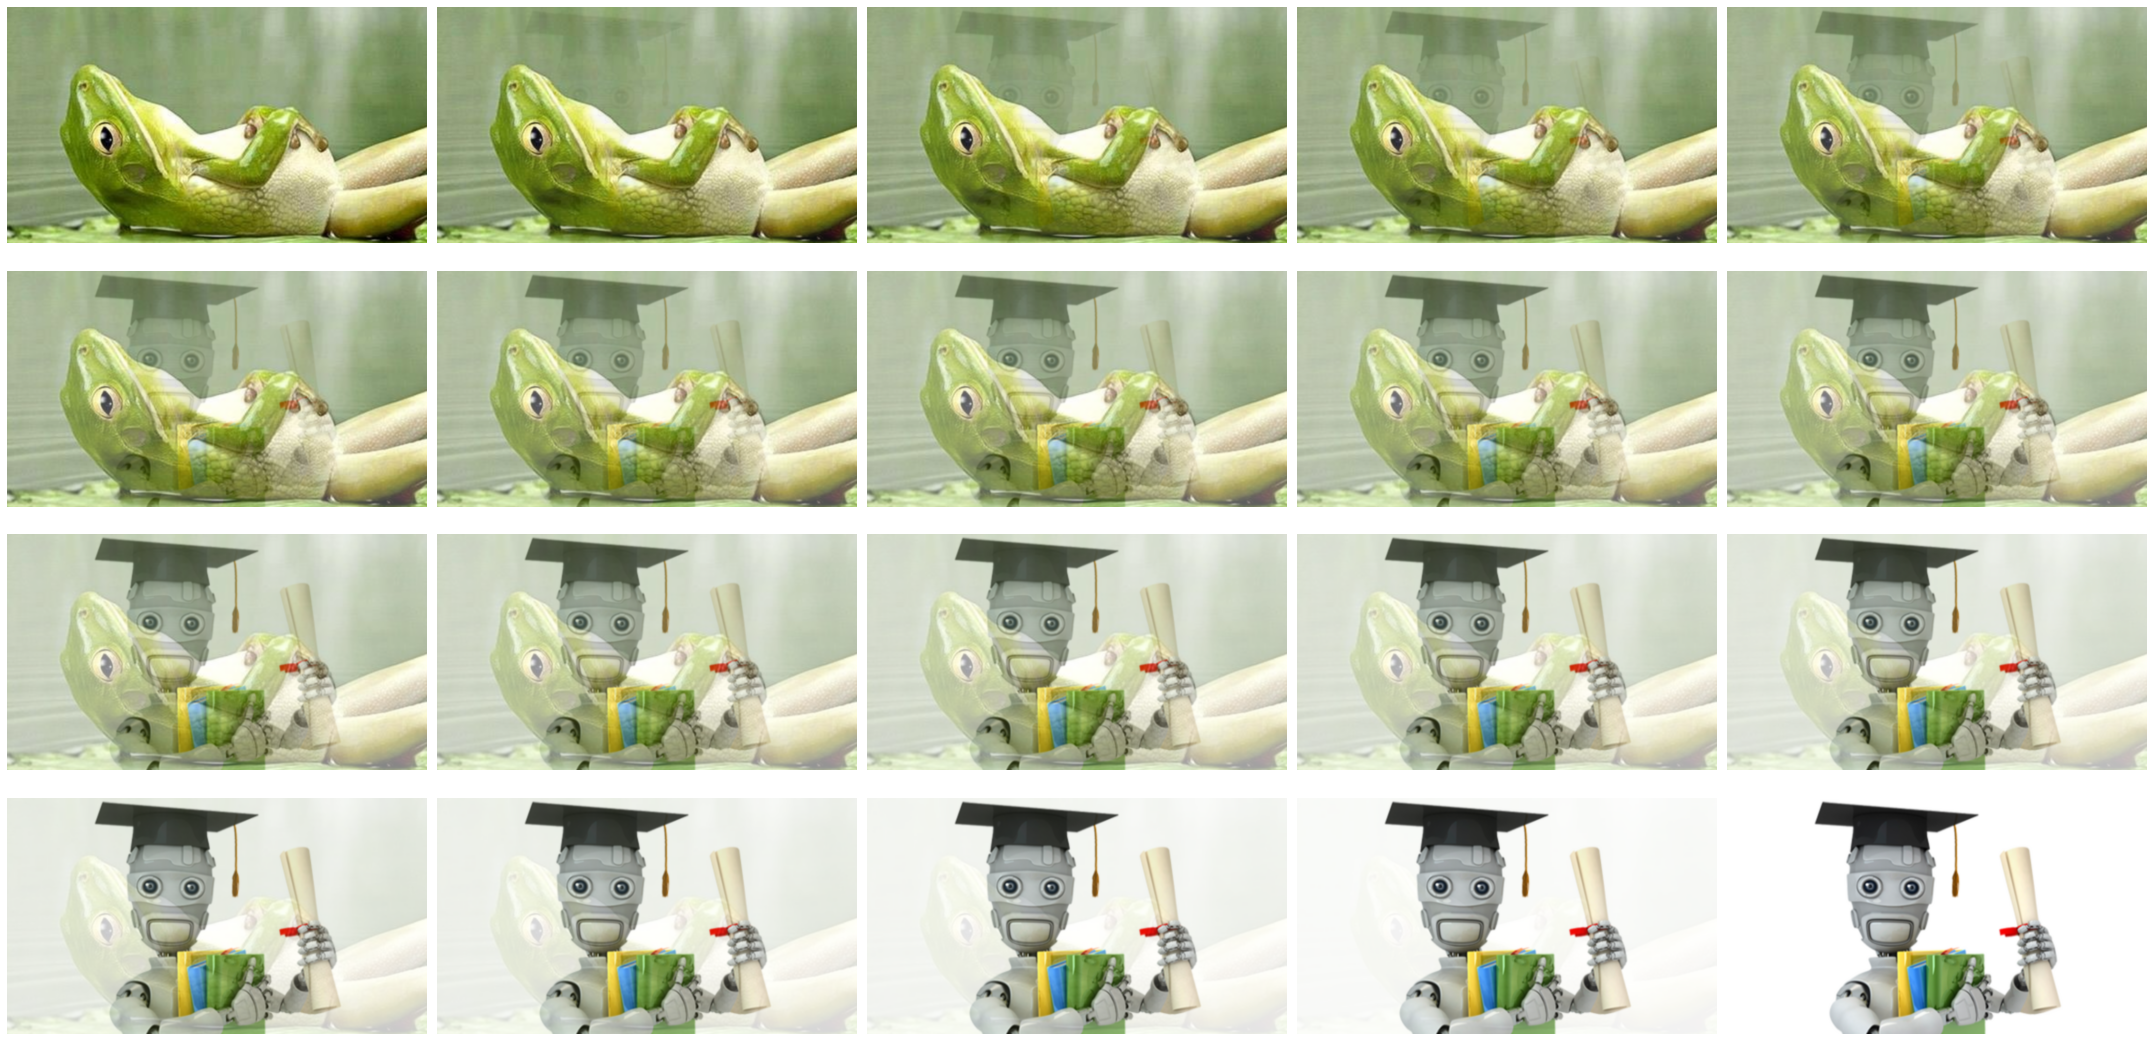

In [42]:
ml   = my_read(img_dir+'/ml.png')
frog = my_read(img_dir+'/frog.jpg')

min_r, min_c = (min(ml.shape[0], frog.shape[0]), 
                min(ml.shape[1], frog.shape[1]))

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30,15))
axes = axes.flat
wgts = np.linspace(0.0,1.0,20)
for ax, wgt in zip(axes, wgts):
    dst = cv2.addWeighted(  ml[:min_r, :min_c], wgt,
                          frog[:min_r, :min_c], 1-wgt, 0)
    my_show(ax, dst)
fig.tight_layout()

## Working with RGB and Histograms

Take an image and create pairs of plots showing (1) a grayscale image for a given RGB color channel and (2) the normalized histogram for that channel.  You'll need to dig into the documentation for `plt.hist` and pay attention to the arguments for: (1) `weights`, and (2) `bins`. See that Apple picture has more red component.

<ipython-input-43-385281daaff0>:10: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  axes[1,idx].hist(range(256), weights=hist, bins=256, color = color)


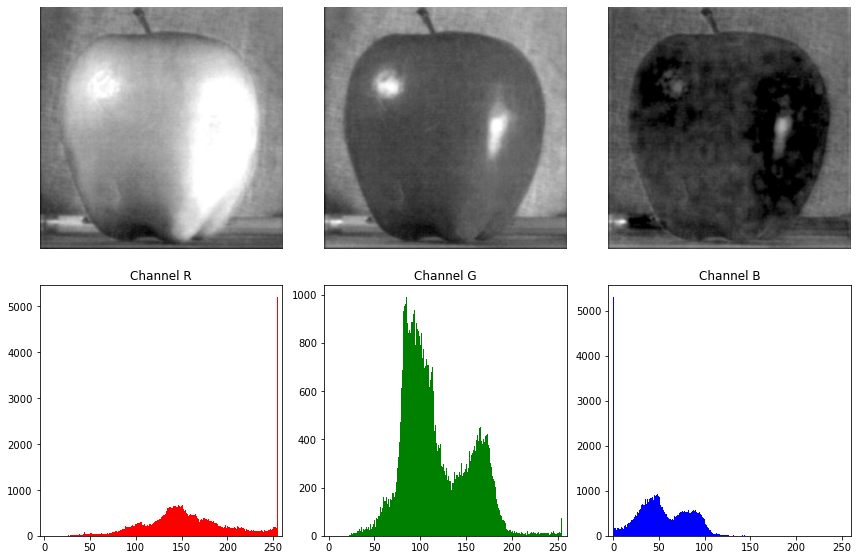

In [43]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
fig.tight_layout()

apple = my_read(img_dir+'/apple.png')
for idx, color in enumerate(['R', 'G', 'B']):
    my_gshow(axes[0,idx], apple[:,:,idx])
    
    hist = cv2.calcHist([apple],[idx],None,[256],[0,256])

    axes[1,idx].hist(range(256), weights=hist, bins=256, color = color)
    axes[1,idx].set_title("Channel {}".format(color))
    axes[1,idx].set_xlim([-5,260]) # make sure we can see 0 and 255  

## Color Detection Exercise

Earlier, we developed a "blue detector" that could be used to find blue regions of an object.  Let's generalize that.   Write a function `inrange_hsv(img, hue, span)` that returns a mask for `img` that *keeps* hue values between $[h-span, h+span]$.  As we mentioned above, OpenCV uses values in $[0,179]$ to store hues.  And, the values are clock-like or modulo ... they wrap around.  Thus, the value 5 is effectively 10 points away from the value 175.  Taking this in to consideration, write `inrange_hsv` so that it will work for any input hue `hue`.  Hint:  keep making use of `inRange` as we did above, but consider using it multiple multiples times and combining the results.

Test it out by looking for "pure" red (RGB=(255,0,0)) in our friend, the apple.  Play around with the `span` to see what value lets you can capture the maximum apple with minimum background.

[160 100 100] [ 20 255 255]
[  0 100 100] [179 255 255]


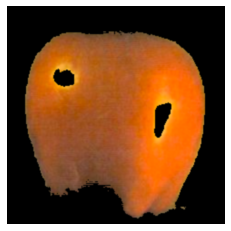

In [45]:
def cv2_rgb_to_hsv(rgb):
    ' use cv2 to convert an rgb value to an hsv value '
    rgb = rgb.reshape(1,1,-1)             # ugly, fake a 1 pixel image
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)[0,0] # undo "fake" image
    return hsv

def inrange_hsv(img, h, span):
    # the range we tolerate for s and v
    sv_lw, sv_up = 100,255  
    h_lwr, h_upr = (h - span) % 180, (h + span) % 180
    
    lwr = np.uint8([h_lwr, sv_lw, sv_lw])
    upr = np.uint8([h_upr, sv_up, sv_up])

    print(lwr, upr)
    
    # near 0/180 ... have to split the range
    if h_lwr > h_upr: 
        bot = np.uint8([0, sv_lw, sv_lw])
        top = np.uint8([179, sv_up, sv_up])
        
        print(bot, top)
        
        in1 = cv2.inRange(img, bot, upr)
        in2 = cv2.inRange(img, lwr, top)
        
        mask = cv2.bitwise_or(in1, in2)
    # keep the simple case simple
    else:
        mask = cv2.inRange(img, lwr, upr)
        
    return mask
 
apple = my_read(img_dir+'/apple.png')
apple_hsv = cv2.cvtColor(apple, cv2.COLOR_RGB2HSV)

red_hsv = cv2_rgb_to_hsv(np.uint8([255,0,0]))

mask = inrange_hsv(apple_hsv, red_hsv[0], 20)
roi = cv2.bitwise_and(apple, apple, mask=mask)
my_show(plt.gca(), roi)